In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_excel("moviestreams.xlsx")   
Netflix_dataset= pd.read_excel("netflix subscribers.xlsx")
Prime_dataset= pd.read_excel("prime video.xlsx")
Disney_dataset= pd.read_excel("disney+.xlsx")

#reading the datasets

In [3]:
dataset.head()                                         

# printing first 5 rows of the dataset using head function

,Title,Year,Age,IMDb,Netflix,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,x,y,z,x1,y1,z1
0,Inception,2010,13+,8.8,1,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,NaN,NaN,NaN,NaN,NaN,NaN
1,The Matrix,1999,18+,8.7,1,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Back to the Future,1985,7+,8.5,1,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,NaN,NaN,NaN,NaN,NaN,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,1,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.drop(['x','y','z','x1','y1','z1'],axis=1,inplace=True)      

#droping unwanted columns usind drop function

dataset.head()

,Title,Year,Age,IMDb,Netflix,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,1,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,1,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,1,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
dataset.shape

(15866, 12)

In [6]:
dataset.isna().sum()                            

#finding the missing values where isna/isnull functions gives boolean value and sum function gives number of missing items

Title             0
Year              0
Age            9084
IMDb            561
Netflix           0
Prime Video       0
Disney+           0
Directors       694
Genres          269
Country         425
Language        585
Runtime         575
dtype: int64

In [7]:
dataset.isnull().mean()                    

#to impute the missing data im trying to find mean of each missing column

Title          0.000000
Year           0.000000
Age            0.572545
IMDb           0.035359
Netflix        0.000000
Prime Video    0.000000
Disney+        0.000000
Directors      0.043741
Genres         0.016954
Country        0.026787
Language       0.036871
Runtime        0.036241
dtype: float64

In [8]:
dataset['Age'].unique()                 

#to replace the data im trying to find the overall ages that are availabe to replace the data

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [9]:
Age_new={'13+':13.0,'18+':18.0,'7+':7.0,'all':1.0,'16+':16.0}    

#to replace the data im trying to change the data type of age from object to float and storing it in the new variable called Agenew

dataset['Agenew']=dataset['Age'].map(Age_new)
dataset['Agenew']

0        13.0
1        18.0
2        13.0
3         7.0
4        18.0
         ... 
15861     NaN
15862     7.0
15863     NaN
15864     NaN
15865     NaN
Name: Agenew, Length: 15866, dtype: float64

In [10]:
dataset['Agenew'].fillna(dataset.groupby('Genres')['Agenew'].transform("median"),inplace=True)   

#implementing the imputation

In [11]:
dataset.isna().sum()

Title             0
Year              0
Age            9084
IMDb            561
Netflix           0
Prime Video       0
Disney+           0
Directors       694
Genres          269
Country         425
Language        585
Runtime         575
Agenew         1168
dtype: int64

In [12]:
dataset.tail()

#printing last 5 rows of our dataset using tail function

,Title,Year,Age,IMDb,Netflix,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Agenew
15861,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,7.0
15862,The Poof Point,2001,7+,4.7,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,7.0
15863,Sharks of Lost Island,2013,NaN,5.7,0,0,1,Neil Gelinas,Documentary,United States,English,NaN,13.0
15864,Man Among Cheetahs,2017,NaN,6.6,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN,13.0
15865,In Beaver Valley,1950,NaN,NaN,0,0,1,James Algar,"Documentary,Short,Family",United States,English,32.0,NaN


In [13]:
dataset['Language'].unique()

array(['English,Japanese,French', 'English', 'Italian', ...,
       'Greek,French', 'English,Swedish,German', 'English,Algonquin'],
      dtype=object)

In [14]:
dataset['Country'].unique()

array(['United States,United Kingdom', 'United States',
       'Italy,Spain,West Germany', ..., 'Canada,Malaysia,United States',
       'United States,Panama,Mexico',
       'United States,Hungary,United Kingdom'], dtype=object)

In [15]:
dataset.dropna(thresh=3)  

#droping the columns that has more than 3 missing values using thresh in dropna function

,Title,Year,Age,IMDb,Netflix,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Agenew
0,Inception,2010,13+,8.8,1,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,13.0
1,The Matrix,1999,18+,8.7,1,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,18.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,13.0
3,Back to the Future,1985,7+,8.5,1,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,7.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,1,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,7.0
15862,The Poof Point,2001,7+,4.7,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,7.0
15863,Sharks of Lost Island,2013,NaN,5.7,0,0,1,Neil Gelinas,Documentary,United States,English,NaN,13.0
15864,Man Among Cheetahs,2017,NaN,6.6,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN,13.0


In [16]:
dataset.isna().sum()

Title             0
Year              0
Age            9084
IMDb            561
Netflix           0
Prime Video       0
Disney+           0
Directors       694
Genres          269
Country         425
Language        585
Runtime         575
Agenew         1168
dtype: int64

In [17]:
#replacing our missing data with the word missing , if i discard the data it would lost most of the data.
#im using the Agenew values and im not using Age so i didnt change the data for that colum.

dataset.fillna({'IMDb':'0.0','Directors':'missing','Genres':'missing','Country':'missing','Language':'missing','Runtime':'0','Agenew':'0'},inplace=True)
dataset.isna().sum()

Title             0
Year              0
Age            9084
IMDb              0
Netflix           0
Prime Video       0
Disney+           0
Directors         0
Genres            0
Country           0
Language          0
Runtime           0
Agenew            0
dtype: int64

In [18]:
dataset.drop(['Age'],axis=1,inplace=True)
dataset.isna().sum()

Title          0
Year           0
IMDb           0
Netflix        0
Prime Video    0
Disney+        0
Directors      0
Genres         0
Country        0
Language       0
Runtime        0
Agenew         0
dtype: int64

In [19]:

dataset.describe()

,Year,Netflix,Prime Video,Disney+
count,15866.000000,15866.000000,15866.000000,15866.000000
mean,2002.547775,0.224379,0.763835,0.035170
std,20.963147,0.417186,0.424738,0.184214
min,1902.000000,0.000000,0.000000,0.000000
25%,2000.000000,0.000000,1.000000,0.000000
50%,2012.000000,0.000000,1.000000,0.000000
75%,2016.000000,0.000000,1.000000,0.000000
max,2021.000000,1.000000,1.000000,1.000000


In [20]:
dataset=dataset.astype({"IMDb":"float","Runtime":"int","Agenew":"int"})
dataset.dtypes

Title           object
Year             int64
IMDb           float64
Netflix          int64
Prime Video      int64
Disney+          int64
Directors       object
Genres          object
Country         object
Language        object
Runtime          int64
Agenew           int64
dtype: object

In [21]:
moviesdata=dataset.copy()
moviesdata1=moviesdata.reset_index()
moviesdf=moviesdata1[['index','Title','Year','IMDb','Netflix','Prime Video','Disney+']]
moviesdf.head()

,index,Title,Year,IMDb,Netflix,Prime Video,Disney+
0,0,Inception,2010,8.8,1,0,0
1,1,The Matrix,1999,8.7,1,0,0
2,2,Avengers: Infinity War,2018,8.5,1,0,0
3,3,Back to the Future,1985,8.5,1,0,0
4,4,"The Good, the Bad and the Ugly",1966,8.8,1,1,0


## Data Visualisation

In [22]:
#finding the values of the Agenew column

dataset['Agenew'].unique()

array([13, 18,  7,  1,  0, 16, 17, 14, 15, 10, 12, 11,  4,  8,  9])

In [23]:
#finding the total number of Agenew values

dataset['Agenew'].nunique()

15

In [24]:
#listing the total count of Agenew

Agenew_count=dataset['Agenew'].value_counts().head(9)
Agenew_count

18    6488
13    2811
7     2041
16    1677
0     1168
1     1044
10     135
14     118
17      95
Name: Agenew, dtype: int64

In [25]:
Agenew_label=dataset['Agenew'].value_counts().index[0:9]
Agenew_label

Int64Index([18, 13, 7, 16, 0, 1, 10, 14, 17], dtype='int64')

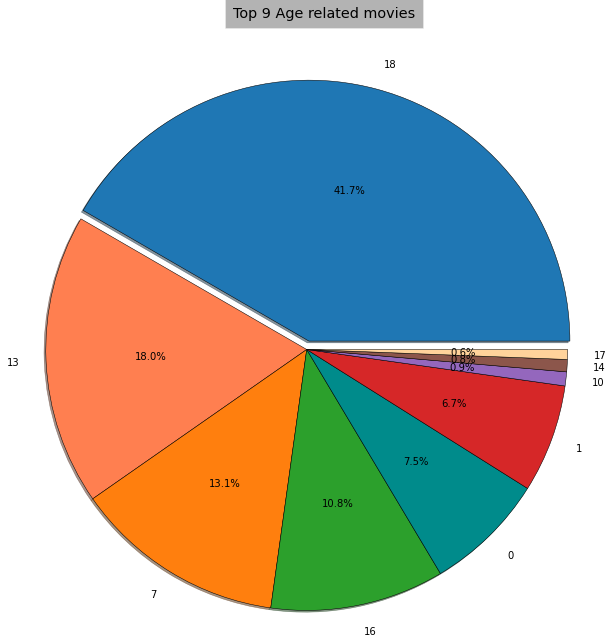

In [26]:

#colors = ['red', 'coral',gold', 'yellowgreen','cyan4', 'blue', 'lightcoral', 'lightskyblue','burlywood1','cadetblue2']

colors = ["#1F77B4","#FF7F50" ,"#FF7F0E", "#2CA02C", "#008B8B","#D62728", "#9467BD", "#8C564B","#FFD39B","#8EE5EE"]

explode = (0.1, 0, 0, 0, 0, 0,0,0,0)  

plt.pie(Agenew_count,labels=Agenew_label,autopct='%1.1f%%',
       colors=colors, shadow=True,radius=3,explode=explode,
       wedgeprops={'edgecolor':'k'})

plt.title("Top 9 Age related movies",x=1,y=2,bbox={'facecolor':'0.7', 'pad':8},loc='right')

plt.show()


In [27]:
#top 9 languages in all OTT platforms

Language_count=dataset['Language'].value_counts().head(10)
Language_count

English            10364
missing              585
Hindi                503
Spanish              259
English,Spanish      250
Italian              164
French               157
English,French       157
Mandarin             150
Japanese             139
Name: Language, dtype: int64

In [28]:
#Getting the index of the Language_count

Language_height=Language_count.index
Language_height

Index(['English', 'missing', 'Hindi', 'Spanish', 'English,Spanish', 'Italian',
       'French', 'English,French', 'Mandarin', 'Japanese'],
      dtype='object')

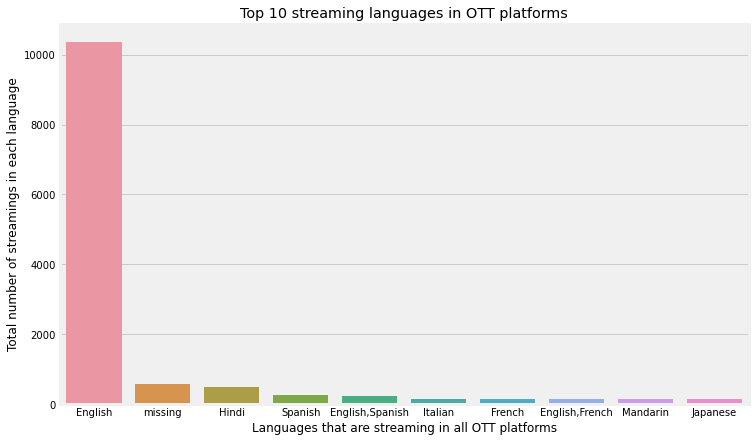

In [29]:
#visualising the Top streaming languages

#setting the figure size

plt.figure(figsize=(11,7))

sns.barplot(x=Language_height,y=Language_count.values)

#Giving the X,Y labels and the title 

plt.xlabel('Languages that are streaming in all OTT platforms')
plt.ylabel('Total number of streamings in each language')
plt.title('Top 10 streaming languages in OTT platforms')

#showing the Barplot

plt.show()

In [30]:
netflix_age=dataset[dataset['Netflix']==1]
netflix_age

,Title,Year,IMDb,Netflix,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Agenew
0,Inception,2010,8.8,1,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148,13
1,The Matrix,1999,8.7,1,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136,18
2,Avengers: Infinity War,2018,8.5,1,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149,13
3,Back to the Future,1985,8.5,1,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116,7
4,"The Good, the Bad and the Ugly",1966,8.8,1,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161,18
...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Krish Trish and Baltiboy I,2009,0.0,1,0,0,Tilak Shetty,Animation,India,"Hindi,English",65,1
3556,ChuChuTV Bedtime Stories & Moral Stories for K...,2019,0.0,1,0,0,missing,missing,missing,missing,0,0
3557,Elles Ã©taient en guerre 1939-1945,2015,0.0,1,0,0,missing,missing,missing,missing,0,0
3558,Shikari,1991,0.0,1,0,0,"Joydip Mukherjee,Zakir Hossain","Action,Crime,Drama,Romance","Bangladesh,India",Bengali,145,13


## Visualising the Netflix movies with respect to age

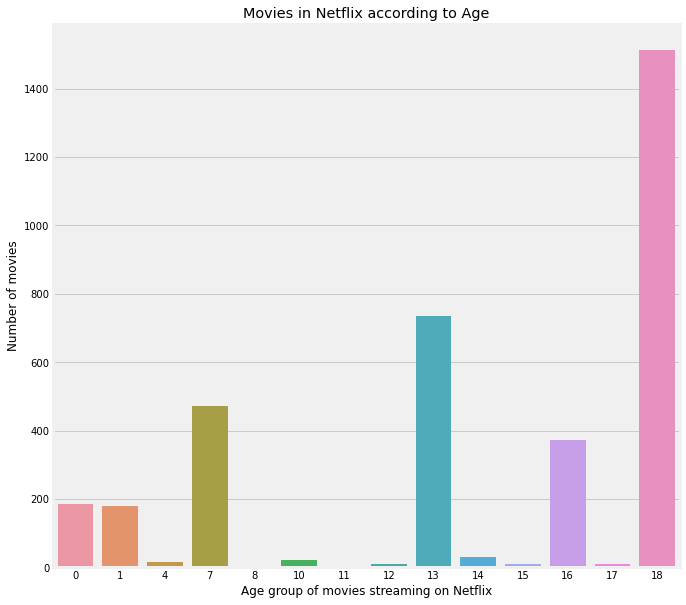

In [31]:
#setting the figure size

plt.figure(figsize=(10,10))

#Building the Bar plot

sns.barplot(data=netflix_age,
           x=netflix_age['Agenew'].value_counts().index,
           y=netflix_age['Agenew'].value_counts())
#Making the bar graph more precise with labels

plt.xlabel('Age group of movies streaming on Netflix')
plt.ylabel('Number of movies')
plt.title('Movies in Netflix according to Age')

#show the build barplot

plt.show()


## Visualising Amazon prime Video movies with respect to age

In [32]:
Prime_age=dataset[dataset['Prime Video']==1]
Prime_age

,Title,Year,IMDb,Netflix,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Agenew
4,"The Good, the Bad and the Ugly",1966,8.8,1,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161,18
6,The Pianist,2002,8.5,1,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150,18
11,3 Idiots,2009,8.4,1,1,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170,13
15,Once Upon a Time in the West,1968,8.5,1,1,0,Sergio Leone,Western,"Italy,United States","Italian,English,Spanish",165,13
31,Drive,2011,7.8,1,1,0,Nicolas Winding Refn,"Crime,Drama",United States,"English,Spanish",100,18
...,...,...,...,...,...,...,...,...,...,...,...,...
15329,Japanese WWII Firearms,2018,0.0,0,1,0,missing,missing,missing,missing,0,0
15330,Cracking the Prophetic Code,2000,0.0,0,1,0,missing,missing,missing,missing,0,0
15331,Behind the Race to the Moon,2002,0.0,0,1,0,missing,missing,missing,missing,51,0
15332,Late War Fighters of the Luftwaffe,1997,0.0,0,1,0,missing,"Documentary,History,War",missing,missing,45,10


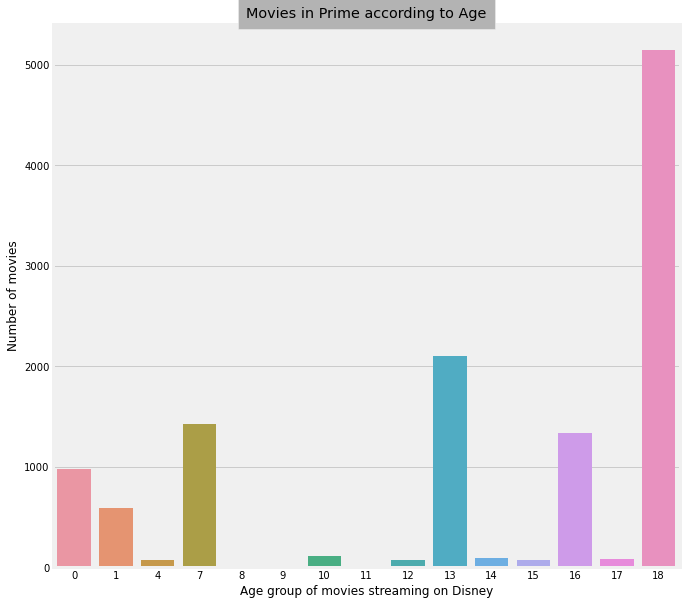

In [33]:
#setting the figure size

plt.figure(figsize=(10,10))

#Building the Bar plot

sns.barplot(data=Prime_age,
           x=Prime_age['Agenew'].value_counts().index,
           y=Prime_age['Agenew'].value_counts())
#Making the bar graph more precise with labels

plt.xlabel('Age group of movies streaming on Disney')
plt.ylabel('Number of movies')
plt.title('Movies in Prime according to Age',bbox={'facecolor':'0.7', 'pad':8})

#show the build barplot

plt.show()

## visualising Disney+ movies with respect to age

In [34]:
Disney_age=dataset[dataset['Disney+']==1]
Disney_age

,Title,Year,IMDb,Netflix,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Agenew
95,Saving Mr. Banks,2013,7.5,1,0,1,John Lee Hancock,"Biography,Comedy,Drama","United States,United Kingdom,Australia",English,125,13
103,Amy,2015,7.8,1,1,1,missing,Drama,United States,English,60,18
122,Bolt,2008,6.8,1,0,1,"Byron Howard,Chris Williams","Animation,Adventure,Comedy,Drama,Family",United States,English,96,7
125,The Princess and the Frog,2009,7.1,1,0,1,"Ron Clements,John Musker","Animation,Adventure,Comedy,Family,Fantasy,Musi...",United States,"English,French",97,1
150,Miracle,2004,7.5,1,0,1,Gavin O'Connor,"Biography,Drama,History,Sport","Canada,United States",English,135,7
...,...,...,...,...,...,...,...,...,...,...,...,...
15861,The Ghosts of Buxley Hall,1980,6.2,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120,7
15862,The Poof Point,2001,4.7,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90,7
15863,Sharks of Lost Island,2013,5.7,0,0,1,Neil Gelinas,Documentary,United States,English,0,13
15864,Man Among Cheetahs,2017,6.6,0,0,1,Richard Slater-Jones,Documentary,United States,English,0,13


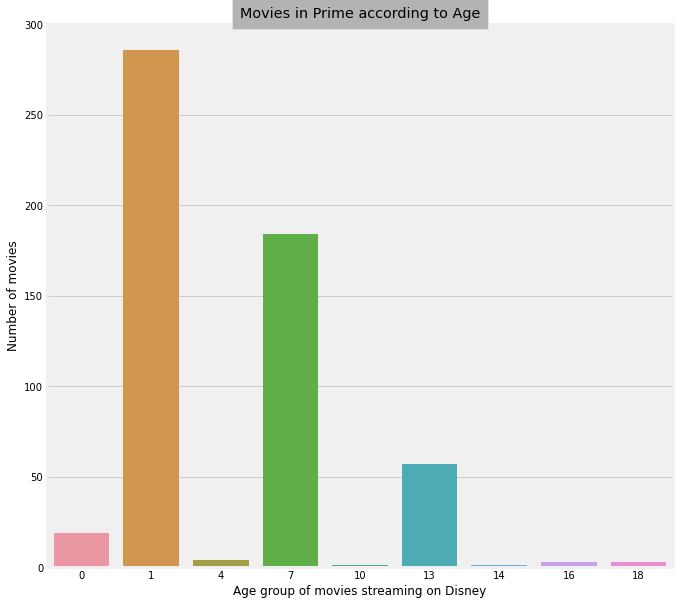

In [35]:
#setting the figure size

plt.figure(figsize=(10,10))

#Building the Bar plot

sns.barplot(data=Disney_age,
           x=Disney_age['Agenew'].value_counts().index,
           y=Disney_age['Agenew'].value_counts())
#Making the bar graph more precise with labels

plt.xlabel('Age group of movies streaming on Disney')
plt.ylabel('Number of movies')
plt.title('Movies in Prime according to Age',bbox={'facecolor':'0.7', 'pad':8})

#show the build barplot

plt.show()

## Visualising IMDb Ratings

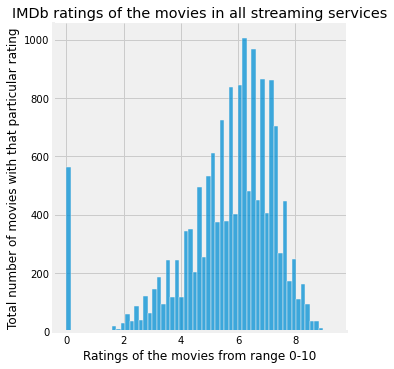

In [36]:

sns.displot(dataset['IMDb'])

plt.xlabel('Ratings of the movies from range 0-10')
plt.ylabel('Total number of movies with that particular rating')
plt.title('IMDb ratings of the movies in all streaming services')

plt.show()

In [37]:
netflix_age['IMDb'].value_counts()[0:5]

0.0    118
5.8    114
7.2    111
6.7    107
6.8    105
7.4    104
7.0    101
7.3    100
6.9     98
5.6     92
5.5     92
5.9     91
5.3     89
6.0     87
5.7     83
7.5     81
7.6     80
5.4     74
5.2     71
5.1     65
7.7     63
7.8     45
5.0     44
Name: IMDb, dtype: int64

In [38]:
IMDb_scores=pd.DataFrame({'OTT Platforms':['Netflix','Prime Video','Disney+'],
                         'IMDb Score':[netflix_age['IMDb'].value_counts()[0],
                                      Prime_age['IMDb'].value_counts()[0],
                                      Disney_age['IMDb'].value_counts()[0]]})

IMDb_scores.head()

,OTT Platforms,IMDb Score
0,Netflix,118
1,Prime Video,448
2,Disney+,1


## Analysing and Visualising Runtime

In [39]:
runtime_data=pd.DataFrame(dict(dataset['Runtime'].value_counts().sort_values(ascending=False)[:10]).items(),
                         columns=['Runtime','Count'])
runtime_data

,Runtime,Count
0,90,921
1,0,575
2,95,456
3,92,402
4,93,390
5,89,389
6,85,388
7,88,377
8,100,376
9,91,365


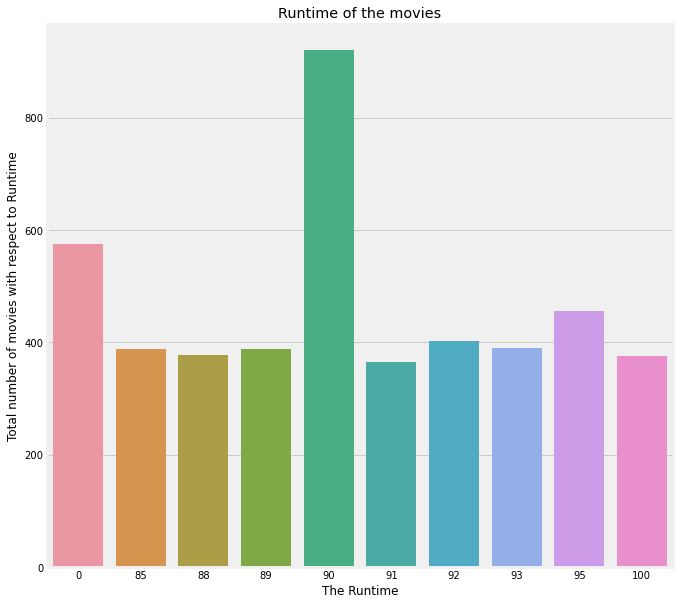

In [40]:
#setting the figure size

plt.figure(figsize=(10,10))

#Building the Bar plot

sns.barplot(data=dataset,
           x=runtime_data['Runtime'],
           y=runtime_data['Count'])
#Making the bar graph more precise with labels

plt.xlabel('The Runtime')
plt.ylabel('Total number of movies with respect to Runtime')
plt.title('Runtime of the movies')

#show the build barplot

plt.show()

## Analysing and Visualising Geners data

In [41]:
genres_data=pd.DataFrame(dict(dataset['Genres'].value_counts().sort_values(ascending=False)[:10]).items(),
                         columns=['Genres','Count'])
genres_data

,Genres,Count
0,Drama,1297
1,Documentary,1155
2,Comedy,1005
3,Horror,423
4,"Comedy,Drama",410
5,"Drama,Romance",367
6,"Comedy,Drama,Romance",303
7,"Horror,Thriller",276
8,"Comedy,Romance",270
9,missing,269


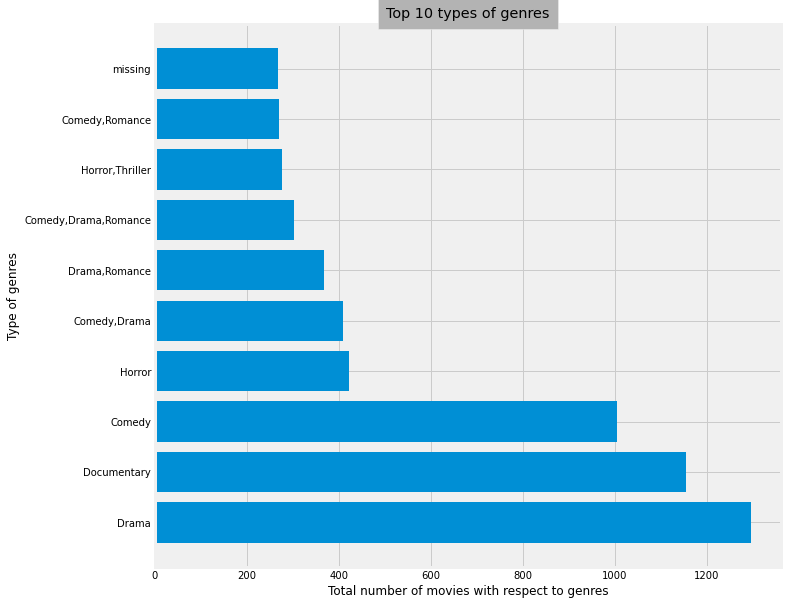

In [42]:
plt.figure(figsize=(10,10))

plt.barh(genres_data.Genres,genres_data.Count)
plt.xlabel('Total number of movies with respect to genres')
plt.ylabel('Type of genres')
plt.title('Top 10 types of genres',bbox={'facecolor':'0.7', 'pad':8})

plt.show()

## Analysing and Visualising the Directors data

In [43]:
director_data=pd.DataFrame(dict(dataset['Directors'].value_counts().sort_values(ascending=False)[:10]).items(),
                         columns=['Directors','Count'])
director_data

,Directors,Count
0,missing,694
1,Jay Chapman,36
2,Joseph Kane,30
3,Cheh Chang,26
4,Jim Wynorski,22
5,Sam Newfield,22
6,David DeCoteau,21
7,William Beaudine,21
8,"RaÃºl Campos,Jan Suter",20
9,Jay Karas,19


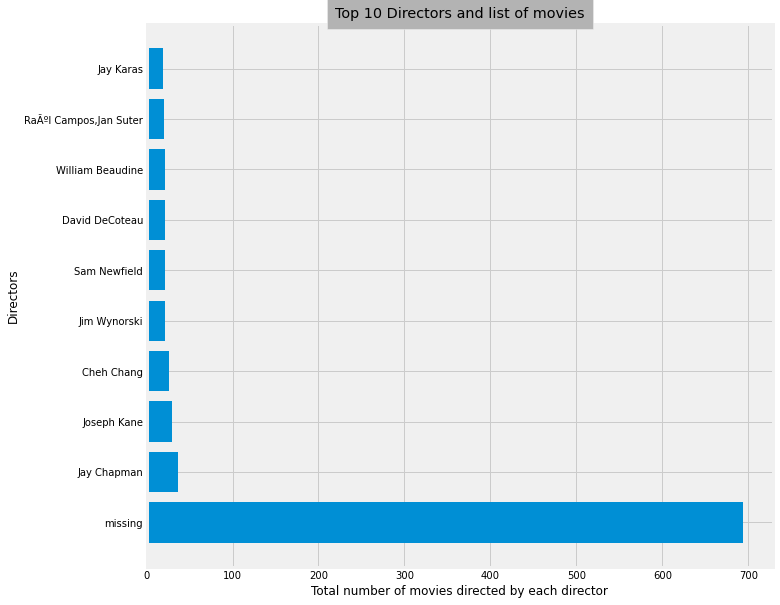

In [44]:
plt.figure(figsize=(10,10))

plt.barh(director_data.Directors,director_data.Count)
plt.xlabel('Total number of movies directed by each director')
plt.ylabel('Directors')
plt.title('Top 10 Directors and list of movies',bbox={'facecolor':'0.7', 'pad':8})

plt.show()

## Visualisation and EDA
    1)Visualising the 3 OTT platforms based on subscribers and Revenue
    2)performing EDA to find Machine learning algorithm can be used

In [45]:
Netflix_dataset

,Year,Revenue(in millions of US$),Net income(in millions of US$),Paid memberships(in millions)
0,2011,3205,226,21.6
1,2012,3609,17,30.4
2,2013,4375,112,41.4
3,2014,5505,267,54.5
4,2015,6780,123,70.8
5,2016,8831,187,89.1
6,2017,11693,559,117.5
7,2018,15794,1211,139.3
8,2019,20156,1867,167.1
9,2020,24996,2761,203.7


In [46]:
Prime_dataset

,Year,Revenue ($bn),Profit/loss ($bn),Subscribers (mm)
0,2016,135.9,2.37,46
1,2017,177.8,3.03,66
2,2018,232.8,10.07,100
3,2019,280.5,11.58,120
4,2020,386.0,21.33,150
5,2021,470.8,33.36,200


In [47]:
Disney_dataset

,Year,Subscribers (mm),Revenue ($bn)
0,2020,33.5,2.8
1,2021,103.6,5.2
2,2022,137.7,6.9


In [48]:
Netflix_dataset.rename(columns={'Revenue(in millions of US$)':'Revenue','Net income(in millions of US$)':'Profit',
                        'Paid memberships(in millions)':'Subscribers'},inplace=True)
Netflix_dataset

,Year,Revenue,Profit,Subscribers
0,2011,3205,226,21.6
1,2012,3609,17,30.4
2,2013,4375,112,41.4
3,2014,5505,267,54.5
4,2015,6780,123,70.8
5,2016,8831,187,89.1
6,2017,11693,559,117.5
7,2018,15794,1211,139.3
8,2019,20156,1867,167.1
9,2020,24996,2761,203.7


In [49]:
Prime_dataset.rename(columns={'Revenue ($bn)':'Revenue','Profit/loss ($bn)':'Profit',
                              'Subscribers (mm)':'Subscribers'},inplace=True)
Prime_dataset

,Year,Revenue,Profit,Subscribers
0,2016,135.9,2.37,46
1,2017,177.8,3.03,66
2,2018,232.8,10.07,100
3,2019,280.5,11.58,120
4,2020,386.0,21.33,150
5,2021,470.8,33.36,200


In [50]:
Disney_dataset.rename(columns={'Subscribers (mm)':'Subscribers','Revenue ($bn)':'Revenue'},inplace=True)
Disney_dataset

,Year,Subscribers,Revenue
0,2020,33.5,2.8
1,2021,103.6,5.2
2,2022,137.7,6.9


## Visualising Netflix Subscribers and Revenue

Text(0.5, 1.0, 'Revenue in millions with respect to year')

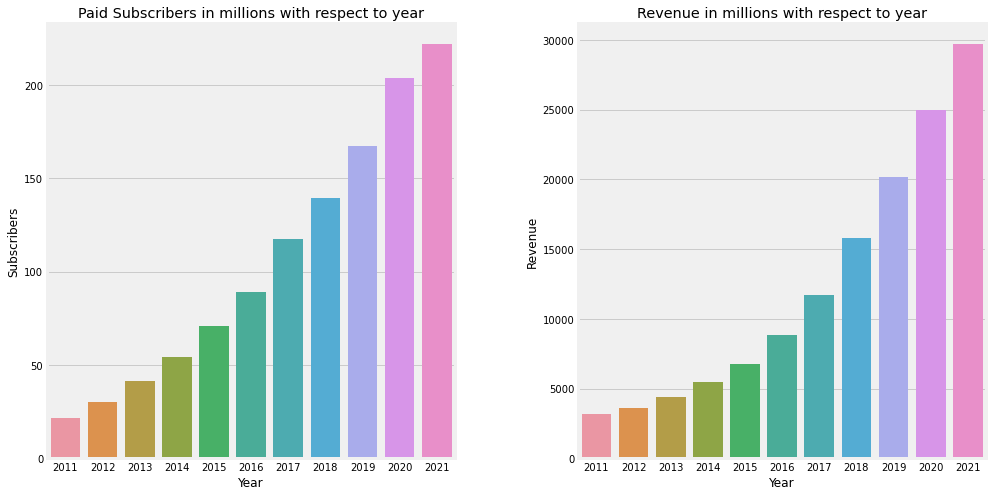

In [51]:
#Creating the subplot 
#setting the figure size and width between the barplots
plt.figure(figsize=(15,8))
plt.subplots_adjust(wspace=0.3)

#representing subscribers in barplot with respect to year
plt.subplot(1,2,1)
sns.barplot(x='Year',y='Subscribers',data=Netflix_dataset)
plt.title('Paid Subscribers in millions with respect to year')

#representing revenue of netflix with respect to year
plt.subplot(1,2,2)
sns.barplot(x='Year',y='Revenue',data=Netflix_dataset)
plt.title('Revenue in millions with respect to year')



## Visualising Prime Subcribers and Revenue

Text(0.5, 1.0, 'Revenue in billions with respect to year')

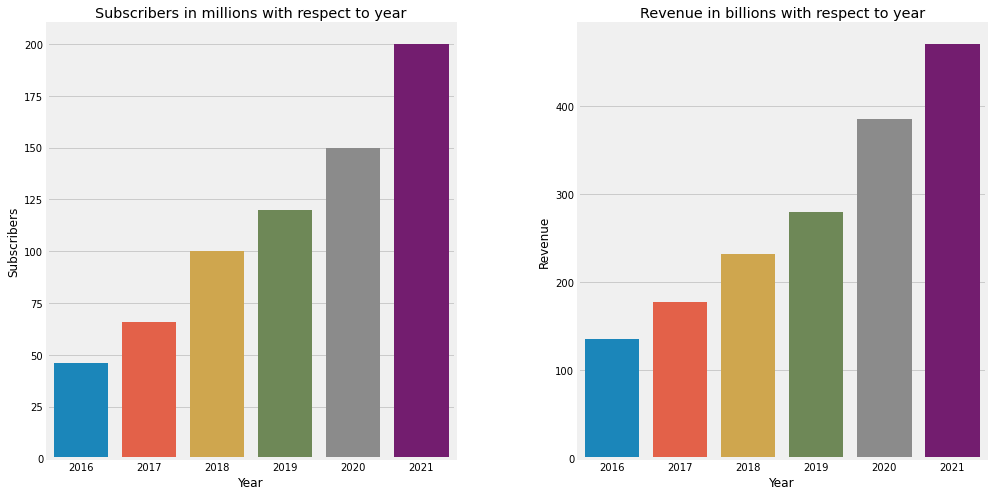

In [52]:
#Creating the subplot 
#setting the figure size and width between the barplots
plt.figure(figsize=(15,8))
plt.subplots_adjust(wspace=0.3)

#representing subscribers in barplot with respect to year
plt.subplot(1,2,1)
sns.barplot(x='Year',y='Subscribers',data=Prime_dataset)
plt.title('Subscribers in millions with respect to year')

#representing revenue of netflix with respect to year
plt.subplot(1,2,2)
sns.barplot(x='Year',y='Revenue',data=Prime_dataset)
plt.title('Revenue in billions with respect to year')



## Visualising Disney+ Subscribers and Revenue

Text(0.5, 1.0, 'Revenue in billions with respect to year')

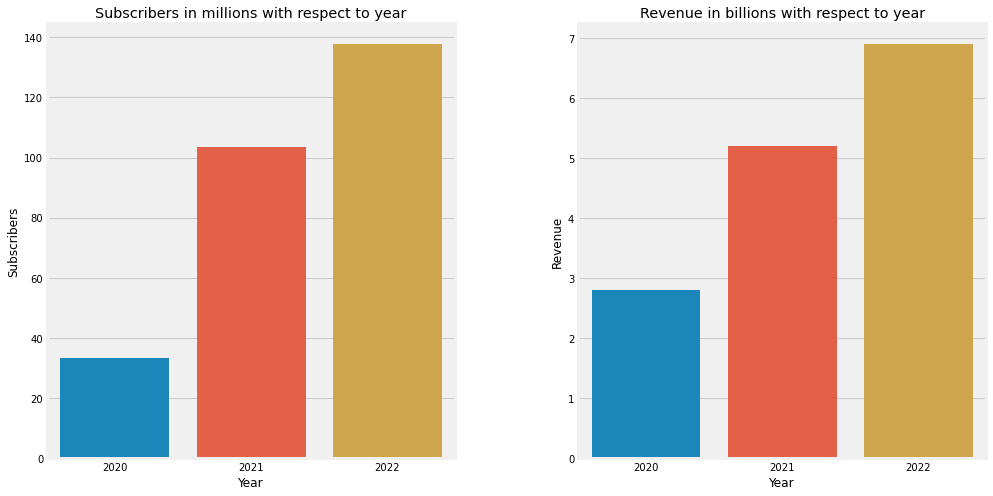

In [53]:
#Creating the subplot 
#setting the figure size and width between the barplots
plt.figure(figsize=(15,8))
plt.subplots_adjust(wspace=0.3)

#representing subscribers in barplot with respect to year
plt.subplot(1,2,1)
sns.barplot(x='Year',y='Subscribers',data=Disney_dataset)
plt.title('Subscribers in millions with respect to year')

#representing revenue of netflix with respect to year
plt.subplot(1,2,2)
sns.barplot(x='Year',y='Revenue',data=Disney_dataset)
plt.title('Revenue in billions with respect to year')



## EDA on tha Dataset

Exploratory data analysis on the big dataset

In [54]:
dataset.head()

,Title,Year,IMDb,Netflix,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Agenew
0,Inception,2010,8.8,1,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148,13
1,The Matrix,1999,8.7,1,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136,18
2,Avengers: Infinity War,2018,8.5,1,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149,13
3,Back to the Future,1985,8.5,1,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116,7
4,"The Good, the Bad and the Ugly",1966,8.8,1,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161,18


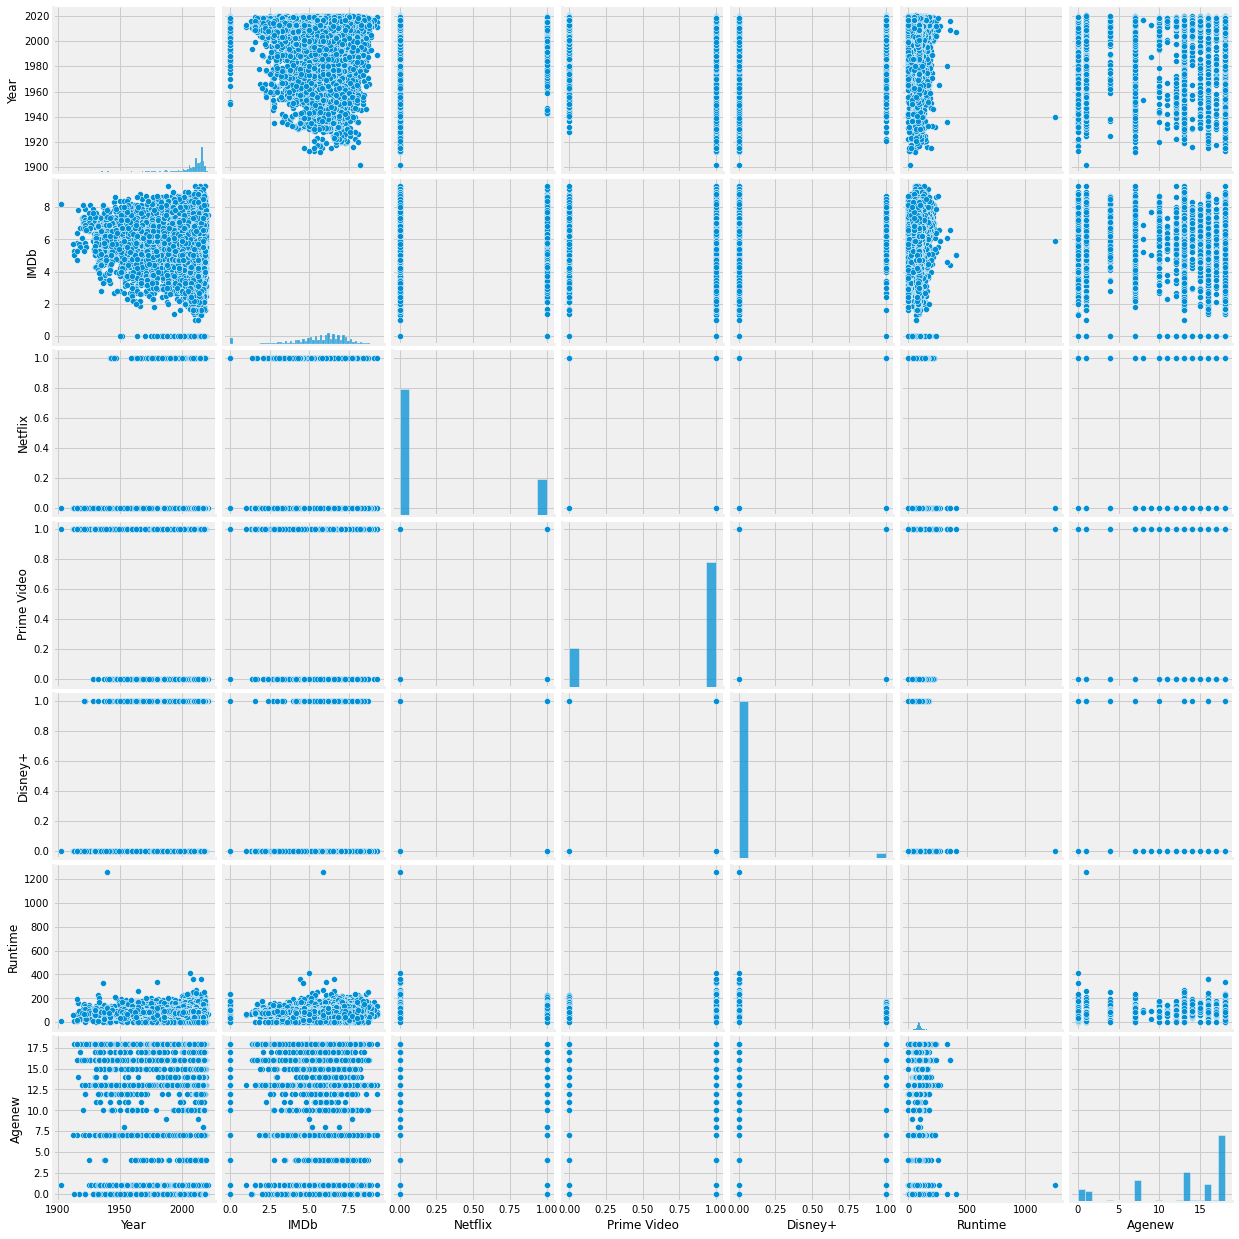

In [55]:
sns.pairplot(dataset)

In [56]:
dataset.corr()

,Year,IMDb,Netflix,Prime Video,Disney+,Runtime,Agenew
Year,1.000000,-0.078989,0.275874,-0.242366,-0.042204,0.033044,0.144380
IMDb,-0.078989,1.000000,0.113838,-0.133753,0.082788,0.223701,-0.017173
Netflix,0.275874,0.113838,1.000000,-0.844570,-0.094487,0.049809,0.045503
Prime Video,-0.242366,-0.133753,-0.844570,1.000000,-0.329665,-0.023719,0.077775
Disney+,-0.042204,0.082788,-0.094487,-0.329665,1.000000,-0.005509,-0.258664
Runtime,0.033044,0.223701,0.049809,-0.023719,-0.005509,1.000000,0.172735
Agenew,0.144380,-0.017173,0.045503,0.077775,-0.258664,0.172735,1.000000


<AxesSubplot:>

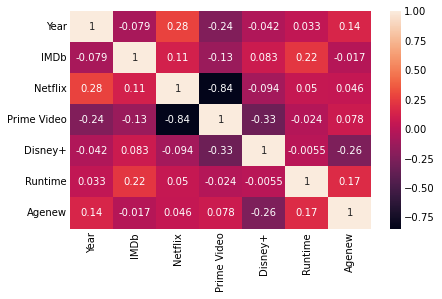

In [57]:
sns.heatmap(dataset.corr(),annot=True)

## Logistic Regression

In [58]:
#creating dummies for the string values

dataset_new=pd.get_dummies(dataset, columns=['Genres','Country','Language','Title','Directors'])

dataset_new.drop(['Netflix','Prime Video','Disney+'],axis=1,inplace=True)
dataset_new

,Year,IMDb,Runtime,Agenew,Genres_Action,"Genres_Action,Adventure","Genres_Action,Adventure,Biography","Genres_Action,Adventure,Biography,Drama,History","Genres_Action,Adventure,Biography,Drama,History,Romance,War","Genres_Action,Adventure,Biography,Drama,Romance",...,"Directors_Ãlvaro Longoria,Gerardo Olivares",Directors_Ãlvaro de ArmiÃ±Ã¡n,"Directors_Ãngel Izquierdo,Ricardo RamÃ³n",Directors_ÃrpÃ¡d Sopsits,Directors_Ã–mer Faruk Sorak,Directors_Ã–zcan Alper,"Directors_Ã‡etin InanÃ§,Robert Aldrich,Bert I. Gordon",Directors_Ã‰douard Molinaro,Directors_Ã‰lie Chouraqui,Directors_Ã‰mile Gaudreault
0,2010,8.8,148,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1999,8.7,136,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,8.5,149,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1985,8.5,116,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1966,8.8,161,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,1980,6.2,120,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15862,2001,4.7,90,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15863,2013,5.7,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15864,2017,6.6,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
dataset_new['Agenew'].value_counts()

18    6488
13    2811
7     2041
16    1677
0     1168
1     1044
10     135
14     118
17      95
4       95
15      86
12      84
11      19
8        3
9        2
Name: Agenew, dtype: int64

In [60]:
#Assigning the dependent and the independent variables

x=dataset_new.drop(['Agenew'],axis=1)
y=dataset_new['Agenew']

In [61]:
#importing the libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100, stratify=y)
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)
model=LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg')
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', penalty='none', random_state=0,
                   solver='newton-cg')

In [62]:
#predicting the values
y_pred=model.predict(x_test)
#printing the predicted values
y_pred

array([ 1, 18, 18, ..., 18, 18,  7])

In [63]:
#printing the accuracy between the actual and the predicted values in logistic regression
accuracy_score(y_test,y_pred)

0.7208569628229363

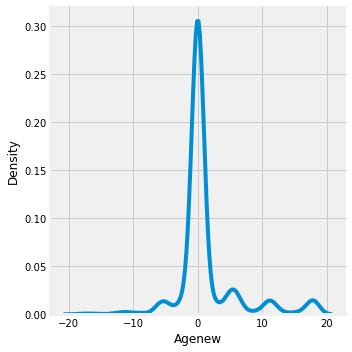

In [64]:
#visual representation between the actal and the predicted values
sns.displot(y_pred-y_test,kind='kde')

In [65]:
#finding the error in prediction by confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[ 120    6    0    8    0    0    0    0    6    0    0    2    0   92]
 [   3   96    1   41    0    2    0    0   28    0    0    9    1   28]
 [   1    3    9    3    0    0    0    0    0    0    0    1    0    2]
 [   2   22    2  211    0    4    1    6   53    4    0   15    1   87]
 [   0    0    0    0    1    0    0    0    0    0    0    0    0    0]
 [   0    1    0    1    0   18    1    0    2    0    0    1    0    3]
 [   0    0    0    0    0    0    3    0    0    0    0    1    0    0]
 [   0    0    0    1    0    0    0   11    1    0    0    0    0    4]
 [   4    6    0   23    0    4    0    0  379    1    2   31    1  111]
 [   0    0    0    0    0    0    0    0    0   22    0    0    0    2]
 [   0    0    0    0    0    0    0    0    1    0   10    0    0    6]
 [   2    1    0    9    0    1    0    0   13    1    0  268    2   38]
 [   0    0    0    0    0    0    0    0    0    0    0    1   14    4]
 [   3    3    0   13    0    0    0    4   62    5

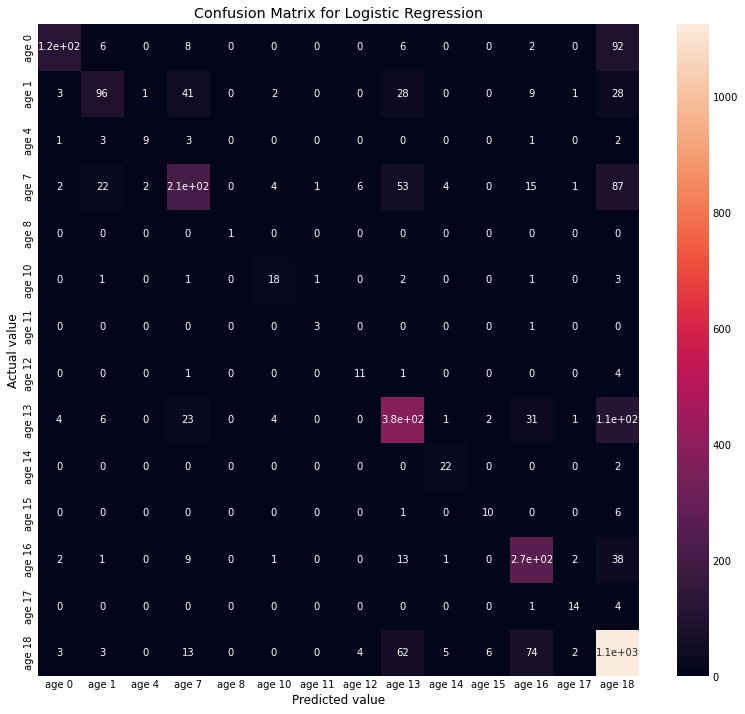

In [66]:
#Visualising the confusion matrix

plt.figure(figsize=(12,12))
ax=sns.heatmap(conf_mat,annot=True)
ax.set_xlabel('Predicted value')
ax.set_ylabel('Actual value')
ax.set_title('Confusion Matrix for Logistic Regression')
ax.xaxis.set_ticklabels(['age 0','age 1','age 4','age 7','age 8','age 10','age 11','age 12','age 13','age 14',
                         'age 15','age 16','age 17','age 18'])     

ax.yaxis.set_ticklabels(['age 0','age 1','age 4','age 7','age 8','age 10','age 11','age 12','age 13','age 14',
                         'age 15','age 16','age 17','age 18'])
plt.show()

## Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [68]:
#Printing the predicted values by random forest
y_pred=clf.predict(x_test)
y_pred

array([18, 18, 18, ..., 18, 18,  7])

In [69]:
#accuracy between actual values and the predicted values by random forest
accuracy_score(y_test,y_pred)

0.6814744801512287

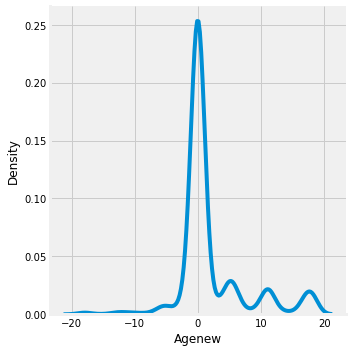

In [70]:
sns.displot(y_pred-y_test,kind='kde')

In [71]:
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[ 103    4    0    3    0    0    0    0    6    0    0    0    0  118]
 [  13   60    1   30    0    2    0    0   25    0    0    8    0   70]
 [   1    1    9    0    0    0    0    0    0    0    0    0    0    8]
 [   5    9    0  161    0    1    0    3   42    4    0   17    1  165]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   1    1    0    0    0   16    0    0    2    0    0    0    0    7]
 [   0    1    0    0    0    0    1    0    0    0    0    0    0    2]
 [   4    0    0    0    0    0    0    9    0    0    0    0    0    4]
 [   9    2    0   13    0    2    0    0  331    1    0   22    1  181]
 [   0    0    0    0    0    0    0    0    0   20    0    0    0    4]
 [   1    0    0    0    0    0    0    0    1    0    4    0    0   11]
 [   0    0    0    5    0    0    0    0   11    1    0  279    1   38]
 [   1    0    0    0    0    0    0    0    0    0    0    1    7   10]
 [  11    1    0    7    0    1    0    1   40    4

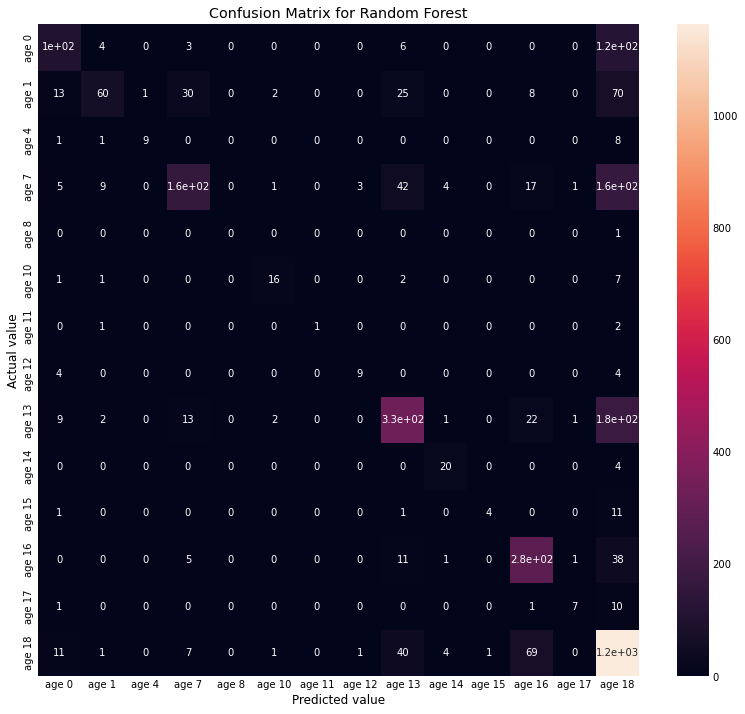

In [72]:
plt.figure(figsize=(12,12))
ax1=sns.heatmap(conf_mat,annot=True)
ax1.set_xlabel('Predicted value')
ax1.set_ylabel('Actual value')
ax1.set_title('Confusion Matrix for Random Forest')
ax1.xaxis.set_ticklabels(['age 0','age 1','age 4','age 7','age 8','age 10','age 11','age 12','age 13','age 14',
                         'age 15','age 16','age 17','age 18'])     

ax1.yaxis.set_ticklabels(['age 0','age 1','age 4','age 7','age 8','age 10','age 11','age 12','age 13','age 14',
                         'age 15','age 16','age 17','age 18'])
plt.show()

## Performing Recommendations

In [73]:
import difflib
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [74]:
dataset.head()

,Title,Year,IMDb,Netflix,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Agenew
0,Inception,2010,8.8,1,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148,13
1,The Matrix,1999,8.7,1,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136,18
2,Avengers: Infinity War,2018,8.5,1,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149,13
3,Back to the Future,1985,8.5,1,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116,7
4,"The Good, the Bad and the Ugly",1966,8.8,1,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161,18


# Data Preprocessing

In [75]:
#printing the first value of genre

dataset['Genres'][0]

'Action,Adventure,Sci-Fi,Thriller'

In [76]:
#Turing all the text to lower case and removing commas and special characters in the text

dataset['clean_genres']=dataset['Genres'].str.lower()
dataset['clean_genres']=dataset['clean_genres'].apply(lambda x: re.sub('[^a-zA-Z]', ' ',x))
dataset['clean_genres']=dataset['clean_genres'].apply(lambda x: re.sub('\s+', ' ',x))
dataset['clean_genres']

0        action adventure sci fi thriller
1                           action sci fi
2                 action adventure sci fi
3                 adventure comedy sci fi
4                                 western
                       ...               
15861        comedy family fantasy horror
15862                comedy family sci fi
15863                         documentary
15864                         documentary
15865            documentary short family
Name: clean_genres, Length: 15866, dtype: object

## Tokenization

In [77]:
dataset['clean_genres']=dataset['clean_genres'].apply(lambda x: nltk.word_tokenize(x))
dataset['clean_genres']

0        [action, adventure, sci, fi, thriller]
1                             [action, sci, fi]
2                  [action, adventure, sci, fi]
3                  [adventure, comedy, sci, fi]
4                                     [western]
                          ...                  
15861         [comedy, family, fantasy, horror]
15862                 [comedy, family, sci, fi]
15863                             [documentary]
15864                             [documentary]
15865              [documentary, short, family]
Name: clean_genres, Length: 15866, dtype: object

In [78]:
#What are stop words in english

stop_words=nltk.corpus.stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [79]:
#Delecting the stopwords

stop_words=nltk.corpus.stopwords.words('english')
Genres=[]
for sentence in dataset['clean_genres']:
    temp=[]
    for word in sentence:
        if word not in stop_words and len(word)>=3:
            temp.append(word)
    Genres.append(temp)
Genres


[['action', 'adventure', 'sci', 'thriller'],
 ['action', 'sci'],
 ['action', 'adventure', 'sci'],
 ['adventure', 'comedy', 'sci'],
 ['western'],
 ['animation', 'action', 'adventure', 'family', 'sci'],
 ['biography', 'drama', 'music', 'war'],
 ['drama', 'western'],
 ['action', 'adventure'],
 ['adventure', 'drama', 'war'],
 ['crime', 'drama'],
 ['comedy', 'drama'],
 ['drama', 'fantasy', 'war'],
 ['drama', 'thriller'],
 ['adventure', 'comedy', 'fantasy'],
 ['western'],
 ['action', 'adventure'],
 ['comedy', 'fantasy', 'romance'],
 ['biography', 'drama', 'history'],
 ['drama', 'romance', 'sci'],
 ['drama'],
 ['biography', 'drama'],
 ['biography', 'drama'],
 ['drama', 'romance'],
 ['comedy'],
 ['drama', 'mystery', 'sci', 'thriller'],
 ['comedy', 'drama', 'romance'],
 ['action', 'sci', 'thriller'],
 ['biography', 'crime', 'drama'],
 ['drama', 'mystery', 'sci'],
 ['comedy', 'drama', 'romance'],
 ['crime', 'drama'],
 ['action', 'horror', 'thriller'],
 ['animation', 'action', 'adventure', 'comed

In [80]:
#Assigning the processed geners to geners

dataset['clean_genres']=Genres
dataset['clean_genres']

0        [action, adventure, sci, thriller]
1                             [action, sci]
2                  [action, adventure, sci]
3                  [adventure, comedy, sci]
4                                 [western]
                        ...                
15861     [comedy, family, fantasy, horror]
15862                 [comedy, family, sci]
15863                         [documentary]
15864                         [documentary]
15865          [documentary, short, family]
Name: clean_genres, Length: 15866, dtype: object

In [81]:
#Processing all the strings  that are using in the recommendation systems

dataset['Directors']=dataset['Directors'].apply(lambda x: x.split(','))
dataset['Language']=dataset['Language'].apply(lambda x: x.split(','))
dataset['Country']=dataset['Country'].apply(lambda x: x.split(','))

In [82]:
dataset['Directors'][0]

['Christopher Nolan']

In [83]:
def clean(sentence):
    temp= []
    for word in sentence:
        temp.append(word.lower().replace(' ',''))
    return temp

In [84]:
dataset['Directors']=[clean(x) for x in dataset['Directors']]
dataset['Language']=[clean(x) for x in dataset['Language']]
dataset['Country']=[clean(x) for x in dataset['Country']]

In [85]:
dataset['Directors'][0]

['christophernolan']

In [86]:
#Joining all the processed data to one 

features=['clean_genres','Directors','Language','Country']
Y=[]
for i in range(len(dataset)):
    words=''
    for fet in features:
        words+=' '.join(dataset[fet][i])+' '
    Y.append(words)
Y

['action adventure sci thriller christophernolan english japanese french unitedstates unitedkingdom ',
 'action sci lanawachowski lillywachowski english unitedstates ',
 'action adventure sci anthonyrusso joerusso english unitedstates ',
 'adventure comedy sci robertzemeckis english unitedstates ',
 'western sergioleone italian italy spain westgermany ',
 'animation action adventure family sci bobpersichetti peterramsey rodneyrothman english spanish unitedstates ',
 'biography drama music war romanpolanski english german russian unitedkingdom france poland germany ',
 'drama western quentintarantino english german french italian unitedstates ',
 'action adventure stevenspielberg english german hebrew spanish arabic nepali unitedstates ',
 'adventure drama war quentintarantino english german french italian germany unitedstates ',
 'crime drama martinscorsese english spanish unitedstates ',
 'comedy drama rajkumarhirani hindi english india ',
 'drama fantasy war guillermodeltoro spanish 

In [87]:
# Printing preprocessed data with the title

dataset['clean_data']=Y
dataset=dataset[['Title','clean_data']]
dataset.head()

,Title,clean_data
0,Inception,action adventure sci thriller christophernolan...
1,The Matrix,action sci lanawachowski lillywachowski englis...
2,Avengers: Infinity War,action adventure sci anthonyrusso joerusso eng...
3,Back to the Future,adventure comedy sci robertzemeckis english un...
4,"The Good, the Bad and the Ugly",western sergioleone italian italy spain westge...


In [88]:
#Feature Extraction

In [89]:
#Converting the 'text' data of the clean_data to 'numerical' value using Tfidv/ectorizer

tfidf=TfidfVectorizer()
selected_features=tfidf.fit_transform(dataset['clean_data'])
print(selected_features)

  (0, 12486)	0.24130554670729584
  (0, 12487)	0.10817423304266591
  (0, 4054)	0.2987604487660401
  (0, 5342)	0.36714738076000325
  (0, 3651)	0.09100535169640603
  (0, 2262)	0.7007255912538893
  (0, 12107)	0.1918660383780946
  (0, 11023)	0.2656133628167656
  (0, 149)	0.23790050582970215
  (0, 59)	0.20677753589025272
  (1, 7346)	0.6571711019442328
  (1, 7096)	0.6571711019442328
  (1, 12487)	0.10936924994295845
  (1, 3651)	0.09201070140155604
  (1, 11023)	0.2685476332856339
  (1, 59)	0.20906183819625787
  (2, 5907)	0.6323146315155873
  (2, 869)	0.643484785407203
  (2, 12487)	0.10709151409957093
  (2, 3651)	0.09009447656992507
  (2, 11023)	0.26295483119262697
  (2, 149)	0.23551935297112722
  (2, 59)	0.20470789371375978
  (3, 10455)	0.8325169687696942
  (3, 2431)	0.22162404852364845
  :	:
  (15861, 3844)	0.29348495500446287
  (15861, 2431)	0.19649999960154224
  (15861, 12487)	0.1269573296228651
  (15861, 3651)	0.10680728772265347
  (15862, 8860)	0.8475699459384368
  (15862, 3844)	0.31183883

In [90]:
# Finding the similarity between each movies using cosine similarity

cos_sim=cosine_similarity(selected_features)
print(cos_sim)

[[1.         0.13476353 0.18798711 ... 0.02681244 0.01978237 0.02581852]
 [0.13476353 1.         0.13341468 ... 0.02710864 0.02000091 0.02610374]
 [0.18798711 0.13341468 1.         ... 0.02654407 0.01958437 0.0255601 ]
 ...
 [0.02681244 0.02710864 0.02654407 ... 1.         0.0856349  0.11176446]
 [0.01978237 0.02000091 0.01958437 ... 0.0856349  1.         0.08246048]
 [0.02581852 0.02610374 0.0255601  ... 0.11176446 0.08246048 1.        ]]


In [91]:
cos_sim.shape

(15866, 15866)

In [92]:
# Building Recommendation systems

In [93]:
# Getting the index of each movie title
indices=pd.Series(dataset.index, dataset['Title']).drop_duplicates()
print(indices)

Title
Inception                             0
The Matrix                            1
Avengers: Infinity War                2
Back to the Future                    3
The Good, the Bad and the Ugly        4
                                  ...  
The Ghosts of Buxley Hall         15861
The Poof Point                    15862
Sharks of Lost Island             15863
Man Among Cheetahs                15864
In Beaver Valley                  15865
Length: 15866, dtype: int64


In [94]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cos_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 20 most similar movies
    sim_scores = sim_scores[1:21]

    # Get the movie index
    movie_index = [i[0] for i in sim_scores]

    # Return the top 20 most similar movies
    return dataset['Title'].iloc[movie_index]

In [95]:
name = input('enter the movie name:')
x=get_recommendations(name)


def your_recommedation(data):
    xdf=x.to_frame()
    x1df=xdf.reset_index()
    x1df=x1df[['index']]
    recomdf=pd.merge(x1df,moviesdf,on='index')
    return recomdf

your_recommedation(x)

enter the movie name:The Matrix


,index,Title,Year,IMDb,Netflix,Prime Video,Disney+
0,83,The Matrix Reloaded,2003,7.2,1,0,0
1,251,The Matrix Revolutions,2003,6.8,1,0,0
2,773,Jupiter Ascending,2015,5.3,1,0,0
3,7978,Bound,2015,3.5,0,1,0
4,1300,Pandora,2016,6.6,1,1,0
5,2325,Lifeline,1997,6.6,1,0,0
6,58,Snowpiercer,2013,7.1,1,0,0
7,7427,Threshold,1981,6.1,0,1,0
8,9390,Impulse,1974,4.7,0,1,0
9,4553,Voyager,1991,6.7,0,1,0
